In [1]:
# Tasks
# Understanding image content with pixel values and intensity
# Demo: Pixel intensity in a gif
# Counting pixels, histogram
# Visualize histogram in a line plot
# Make the dark images lighter with histogram equalization
# Convolution operation
# Some popular filters to know
# Discuss when to use these filters

In [2]:
# import required libraries
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.exposure import rescale_intensity

In [3]:
# Pixel intensity changes from 0 t 255, 255 included.
# Pixel value 0 represents black color
# Pixel value 255 represents white color

In [4]:
# Let's create pixel intensity gif
cwd = os.getcwd()
for idx in range(0, 256):
    frame = np.full((256, 256), idx).astype(np.uint8)
    cv2.putText(frame, 
                str(idx), 
                (200, 20), 
                cv2.FONT_HERSHEY_PLAIN, 
                1, 
                (0, 255, 0), 
                3)
    cv2.imwrite(f"{cwd}/output/frame{idx}.png", frame)

In [5]:
# To be able to generate .gif file out of all these frames, I run this code
if not os.path.exists("output/output.gif"):
    !ffmpeg -i output/frame%d.png output/output.gif

In [6]:
import ipywidgets as widgets
display(widgets.HTML('<img src="output/output.gif" width="750" align="center">'))

HTML(value='<img src="output/output.gif" width="750" align="center">')

In [7]:
# Question
# How many different R G B combination is needed to be able to the same
# thing in RGB format?

In [8]:
# Calculate image histogram with OpenCV

# Load the frame
frame_path = cwd + "/frame.jpg"
frame = cv2.imread(frame_path)
frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

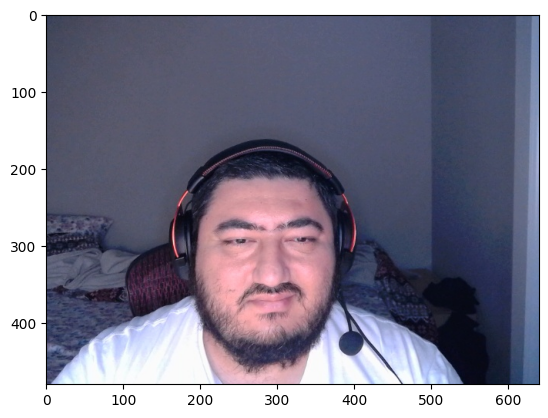

In [9]:
plt.imshow(frame[...,::-1])
plt.show()

In [10]:
%%html
<iframe src="https://docs.opencv.org/4.7.0/d8/dbc/tutorial_histogram_calculation.html" width="640" height="480"></iframe>

In [11]:
# Split frame R G B channels into individuals
frame_b, frame_g, frame_r = cv2.split(frame)

In [12]:
# OpenCV function "calcHist" calculates histogram for you
hist_r = cv2.calcHist([frame_r], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([frame_g], [0], None, [256], [0, 256])
hist_b = cv2.calcHist([frame_b], [0], None, [256], [0, 256])

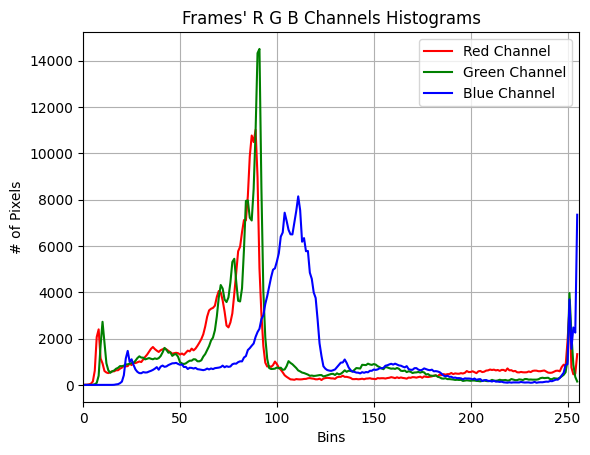

In [13]:
# plot the histogram
plt.figure()
plt.title("Frames' R G B Channels Histograms")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist_r, label="Red Channel", color='red')
plt.plot(hist_g, label="Green Channel", color='green')
plt.plot(hist_b, label="Blue Channel", color='blue')
plt.xlim([0, 256])
plt.legend()
plt.grid()
plt.show()

In [14]:
%%html
<iframe src="https://docs.opencv.org/4.7.0/d4/d1b/tutorial_histogram_equalization.html" width="640" height="480"></iframe>

In [15]:
# Apply histogram equalization to the grayscale frame image
equalized = cv2.equalizeHist(frame_gray)

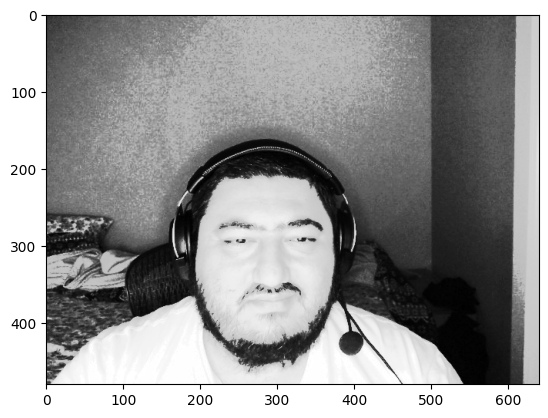

In [16]:
plt.imshow(equalized, cmap='gray')
plt.show()

In [17]:
# Apply histogram equalization to all color channels
equalized_r = cv2.equalizeHist(frame_r)
equalized_g = cv2.equalizeHist(frame_g)
equalized_b = cv2.equalizeHist(frame_b)

In [18]:
# OpenCV function "calcHist" calculates histogram for you
equalized_r_hist = cv2.calcHist([equalized_r], [0], None, [256], [0, 256])
equalized_g_hist = cv2.calcHist([equalized_g], [0], None, [256], [0, 256])
equalized_b_hist = cv2.calcHist([equalized_b], [0], None, [256], [0, 256])

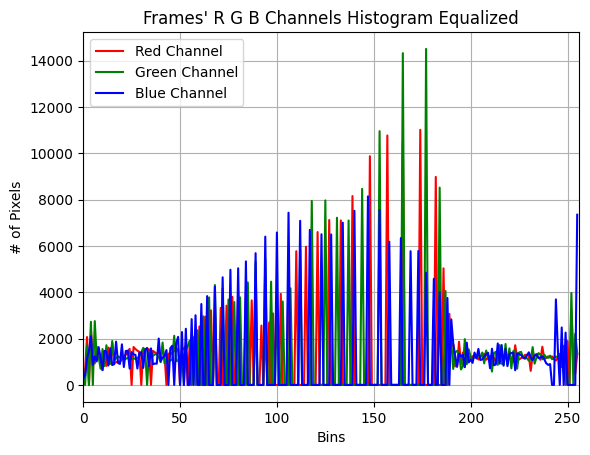

In [19]:
# plot the histogram
plt.figure()
plt.title("Frames' R G B Channels Histogram Equalized")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(equalized_r_hist, label="Red Channel", color='red')
plt.plot(equalized_g_hist, label="Green Channel", color='green')
plt.plot(equalized_b_hist, label="Blue Channel", color='blue')
plt.xlim([0, 256])
plt.legend()
plt.grid()
plt.show()

In [20]:
equalized_frame_rgb = cv2.merge((equalized_r, equalized_g, equalized_b))

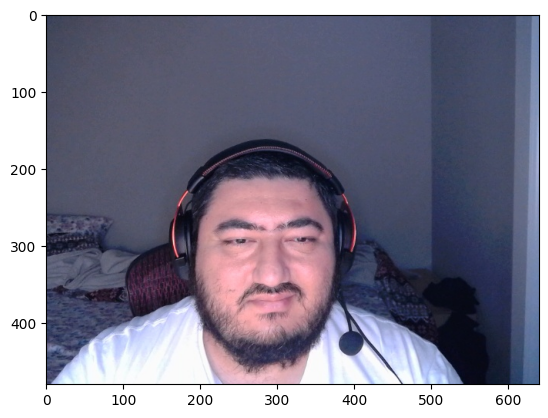

In [21]:
plt.imshow(frame[...,::-1])
plt.show()

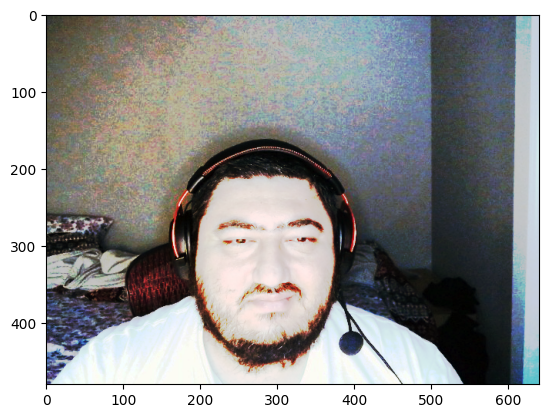

In [22]:
plt.imshow(equalized_frame_rgb)
plt.show()

## Convolution Operations

In [23]:
%%html
<iframe src="https://docs.opencv.org/4.7.0/d4/d13/tutorial_py_filtering.html" width="640" height="480"></iframe>

In [24]:
# User defined function

def convolve(image, kernel):
    # get image and kernel sizes
    (iH, iW) = image.shape[:2]
    (kH, kW) = kernel.shape[:2]
    
    pad = (kW - 1) // 2
    
    image = cv2.copyMakeBorder(image, pad, pad, pad, pad,
    cv2.BORDER_REPLICATE)
    output = np.zeros((iH, iW), dtype="float32")
    
    for y in np.arange(pad, iH + pad):
        for x in np.arange(pad, iW + pad):
            roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]
            k = (roi * kernel).sum()
            output[y - pad, x - pad] = k
    
    # rescale the output image to be in the range [0, 255]
    output = rescale_intensity(output, in_range=(0, 255))
    output = (output * 255).astype("uint8")

    return output

In [25]:
sharpen_kernel = np.array(
    [
        [0, -1, 0], 
        [-1, 5, -1], 
        [0, -1, 0]
    ]
)

In [26]:
sharpened_frame_gray = convolve(frame_gray, sharpen_kernel)

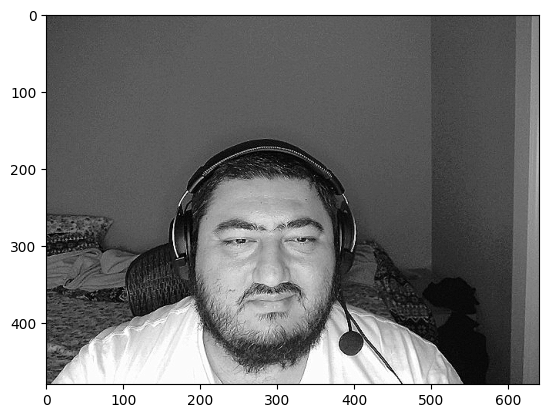

In [27]:
plt.imshow(sharpened_frame_gray, cmap='gray')
plt.show()

In [28]:
# OpenCV version of the convolution operation
cv2_sharpened_frame_gray = cv2.filter2D(
    src=frame_gray, 
    ddepth=-1, 
    kernel=sharpen_kernel
)

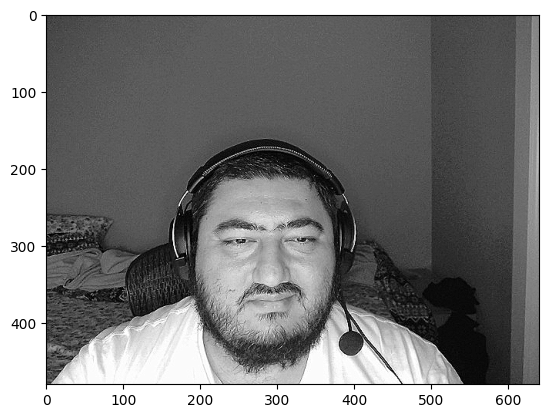

In [29]:
plt.imshow(cv2_sharpened_frame_gray, cmap='gray')
plt.show()

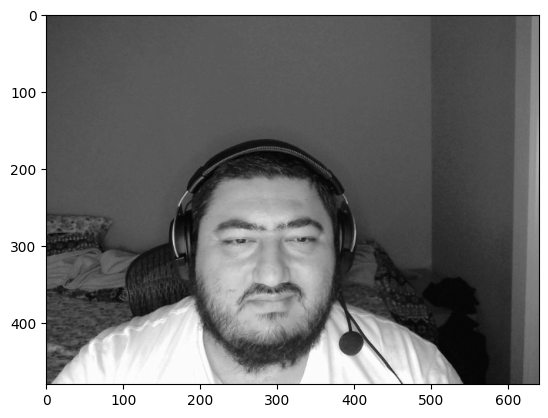

In [30]:
plt.imshow(frame_gray, cmap='gray')
plt.show()

In [31]:
# Apply Gaussian filter on gray image

In [32]:
frame_gray_gaussian_blurred = cv2.GaussianBlur(frame_gray,(5,5),0)

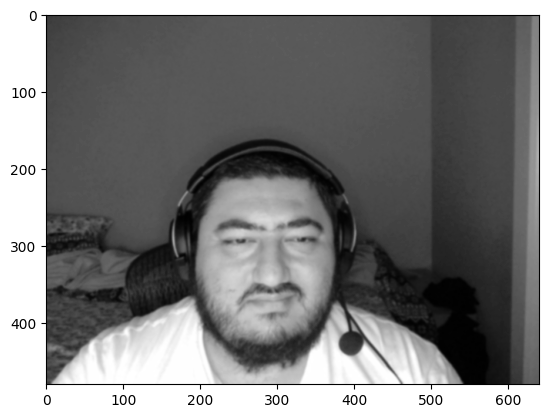

In [33]:
plt.imshow(frame_gray_gaussian_blurred, cmap='gray')
plt.show()

In [34]:
# Apply edge detection to gaussian filtered gray image

In [35]:
canny_edges_on_gaussian_blurred = cv2.Canny(
    frame_gray_gaussian_blurred, 75, 200
)

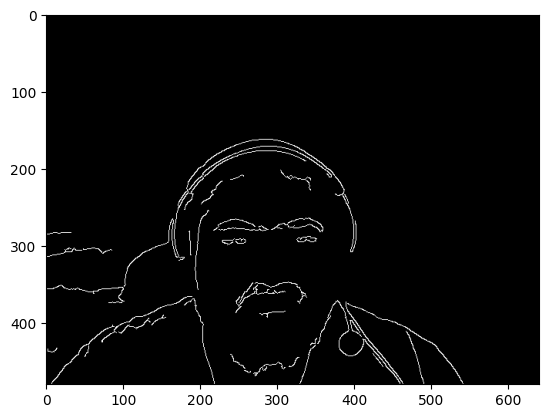

In [36]:
plt.imshow(canny_edges_on_gaussian_blurred, cmap='gray')
plt.show()

In [37]:
# Apply edge detection to directly gray image

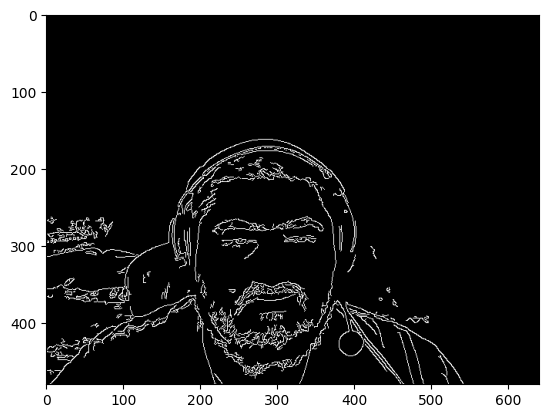

In [38]:
canny_edges_on_gray_frame = cv2.Canny(frame_gray,75,200)
plt.imshow(canny_edges_on_gray_frame, cmap='gray')
plt.show()